In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import string
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install lightgbm
import lightgbm as ltb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score 

Defaulting to user installation because normal site-packages is not writeable


In [2]:
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

In [3]:
df_train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
df_test.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [6]:
df_train["label"].value_counts()

label
0    20019
1    19981
Name: count, dtype: int64

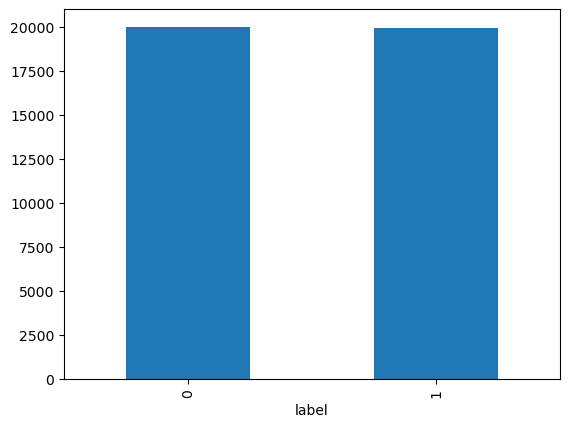

In [7]:
df_train["label"].value_counts().plot.bar()
plt.show()

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


In [9]:
df_test["label"].value_counts()

label
1    2505
0    2495
Name: count, dtype: int64

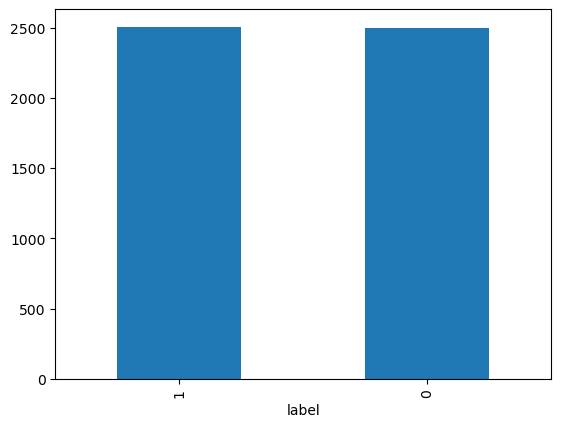

In [10]:
df_test["label"].value_counts().plot.bar()
plt.show()

In [11]:
TEXT_CLEANING_RE = "[^a-zA-z\s]" 

def clean_text(text):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip() 
    cleaned_text = re.sub('\s+', ' ', text).strip() 
    return cleaned_text

df_train['text'] = df_train['text'].apply(lambda x: clean_text(x))
df_test['text'] = df_test['text'].apply(lambda x: clean_text(x))
df_train.head()

,text,label
0,i grew up b watching and loving the thunderbir...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [12]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_train["text"] = df_train["text"].apply(lambda text: remove_stopwords(text))
df_test["text"] = df_test["text"].apply(lambda text: remove_stopwords(text))
df_train.head()

,text,label
0,grew b watching loving thunderbirds mates scho...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1


In [13]:
from collections import Counter
cnt = Counter()
for text in df_train["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20)

[('br', 161468),
 ('movie', 70536),
 ('film', 63660),
 ('one', 42881),
 ('like', 32292),
 ('good', 23921),
 ('time', 20169),
 ('even', 19969),
 ('would', 19687),
 ('really', 18556),
 ('story', 18484),
 ('see', 18399),
 ('well', 17028),
 ('much', 15471),
 ('get', 14807),
 ('bad', 14753),
 ('people', 14562),
 ('also', 14546),
 ('great', 14489),
 ('first', 13971)]

In [14]:
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in {'br','movie','film','one','story','get'}])

df_train["text"] = df_train["text"].apply(lambda text: remove_freqwords(text))
df_test["text"] = df_test["text"].apply(lambda text: remove_freqwords(text))
df_train.head()

,text,label
0,grew b watching loving thunderbirds mates scho...,0
1,put dvd player sat coke chips expectations hop...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1


In [15]:
def cleaning (df_train):
    df_train = df_train.lower()
    df_train =  re.sub(r'@\S+', '',df_train)  
    df_train =  re.sub(r'http\S+', '',df_train) 
    df_train =  re.sub(r'pic.\S+', '',df_train)
    df_train =  re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚ']", ' ',df_train) 
    df_train =  re.sub(r'\s+[a-zA-ZáéíóúÁÉÍÓÚ]\s+', ' ', df_train+' ')  
    df_train = "".join([i for i in text if i not in string.punctuation])
    words = word_tokenize(df_train)
    stopwords = nltk.corpus.stopwords.words('english')   
    df_train = " ".join([i for i in words if i not in stopwords])
    df_train= re.sub("\s[\s]+", " ",df_train).strip()
    df_train= re.sub("\s[\s]+", " ",df_train).strip() 
    return df_train

In [16]:
df_train["text"]=df_train["text"].apply(cleaning)

In [17]:
def lemm(data):
    wordnet = WordNetLemmatizer()
    lemmanized = []
    for i in range(len(data)):
        lemmed = []
        words = word_tokenize(data['text'].iloc[i])
        for w in words:
            lemmed.append(wordnet.lemmatize(w))
        lemmanized.append(lemmed)

    data['lemmanized'] = lemmanized
    data['text'] = data['lemmanized'].apply(' '.join)
    data=data.drop("lemmanized",axis=1)
    return data

In [18]:
df_train=lemm(df_train)

In [19]:
df_train.head()

,text,label
0,would film good gross estimated award nominati...,0
1,would film good gross estimated award nominati...,0
2,would film good gross estimated award nominati...,0
3,would film good gross estimated award nominati...,0
4,would film good gross estimated award nominati...,1


In [20]:
df_test = pd.read_csv("Test.csv")
df_test["text"]=df_test["text"].apply(cleaning)
df_test=lemm(df_test)

In [21]:
df_test.head()

,text,label
0,would film good gross estimated award nominati...,0
1,would film good gross estimated award nominati...,0
2,would film good gross estimated award nominati...,0
3,would film good gross estimated award nominati...,1
4,would film good gross estimated award nominati...,0


In [22]:
tfid = TfidfVectorizer()
X_train = tfid.fit_transform(df_train["text"])
X_test = tfid.transform(df_test["text"])

In [23]:
y_train = df_train["label"]
y_test = df_test["label"]

In [24]:
svd = TruncatedSVD(n_components=50)

X_train_pca = svd.fit_transform(X_train)

X_test_pca = svd.transform(X_test)

print('Training features matrix is: ', X_train_pca.shape)
print('Test features matrix is: ', X_test_pca.shape)

Training features matrix is:  (40000, 50)
Test features matrix is:  (5000, 50)


C:\Users\gayat\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_truncated_svd.py:273: RuntimeWarning: divide by zero encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
C:\Users\gayat\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_truncated_svd.py:273: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


In [25]:
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)
preds = lr.predict(X_test_pca)
print(accuracy_score(preds,y_test))

0.499


In [26]:
tree = DecisionTreeClassifier()
tree.fit(X_train_pca,y_train)
preds = tree.predict(X_test_pca)
print(accuracy_score(preds,y_test))

0.499


In [27]:
forest = RandomForestClassifier(min_samples_split=2,bootstrap=False, max_depth=None, random_state=42,n_jobs=-1, max_features='sqrt')
forest.fit(X_train_pca,y_train)
preds = forest.predict(X_test_pca)
print(accuracy_score(preds,y_test))

0.499


In [28]:
clf = ltb.LGBMClassifier()
clf.fit(X_train_pca, y_train)
preds = clf.predict(X_test_pca)
print(accuracy_score(preds,y_test))

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 19981, number of negative: 20019
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499525 -> initscore=-0.001900
[LightGBM] [Info] Start training from score -0.001900
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training 

In [29]:
naive = GaussianNB()
naive.fit(X_train_pca, y_train)
preds = naive.predict(X_test_pca)
print(accuracy_score(preds,y_test))

0.499


In [30]:
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_pca, y_train)
preds = SVM.predict(X_test_pca)
print(accuracy_score(preds,y_test))

0.499


In [31]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear'],   
}

In [32]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

In [33]:
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [34]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.500475
